## Data Modeling
Describe and justify the process for analyzing or modeling the data.

Questions to consider:

How did you analyze or model the data?
How did you iterate on your initial approach to make it better?
Why are these choices appropriate given the data and the business problem?

# Contents
1. Load the dataset
2. Baseline model
3. Model Iterations

## 1.Loading Dataset

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from my_modules.import_datasets import create_dataset, process_dataset

train_dir = "data/chest_xray/new_train"
val_dir = "data/chest_xray/new_val"
test_dir = "data/chest_xray/new_test"

train_ds = process_dataset(create_dataset(train_dir))
val_ds = process_dataset(create_dataset(val_dir))
test_ds = process_dataset(create_dataset(test_dir))

for inputs, labels in train_ds.take(1):
        input_shape = inputs.shape[1:]
        break


Found 4684 files belonging to 2 classes.
Found 585 files belonging to 2 classes.
Found 587 files belonging to 2 classes.


For metrics, I chose accuracy to show overall performance of the model, Recall to emphasise the importance of minimizing false negatives, and AUC. 

## Baseline Model

Training time: 3.5183842182159424 seconds



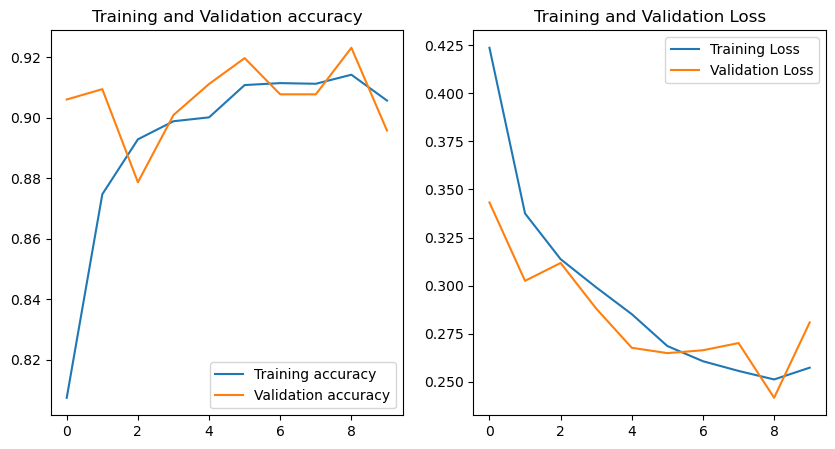

,loss,auc,recall,accuracy
Train,0.295557,0.941856,0.848449,0.878950
Val,0.280837,0.948670,0.880562,0.895727
Diff,-0.014720,0.006814,0.032113,0.016777


------------------------------



In [23]:
from my_modules.model_evaluator import modeler
from tensorflow.keras import models, layers, metrics, callbacks, regularizers

baseline_model = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(10, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')])

baseline_results, baseline_model = modeler(
    baseline_model, file_name= 'baseline', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=10)


Training time: 54.202054023742676 seconds



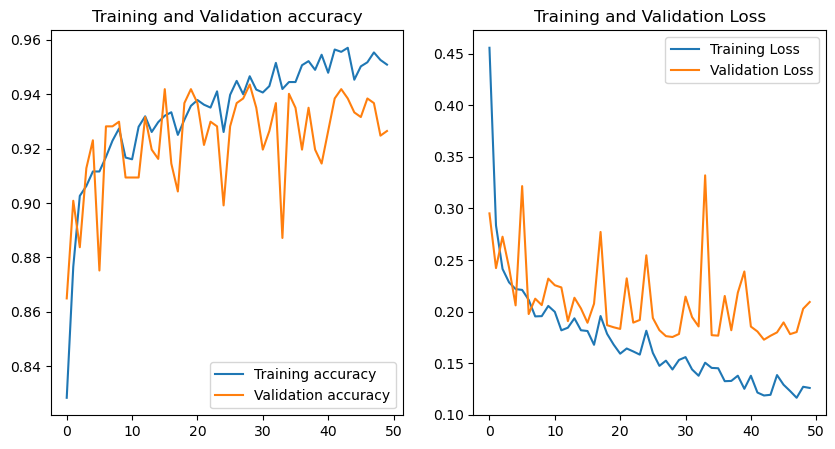

,loss,auc,recall,accuracy
Train,0.124436,0.991764,0.993271,0.951964
Val,0.209238,0.976395,0.985949,0.926496
Diff,0.084801,-0.015369,-0.007322,-0.025468


------------------------------



In [24]:
model_2 = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')])

results_2, model_2 = modeler(
    model_2, file_name= 'model_2', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50)

Training time: 54.79781198501587 seconds



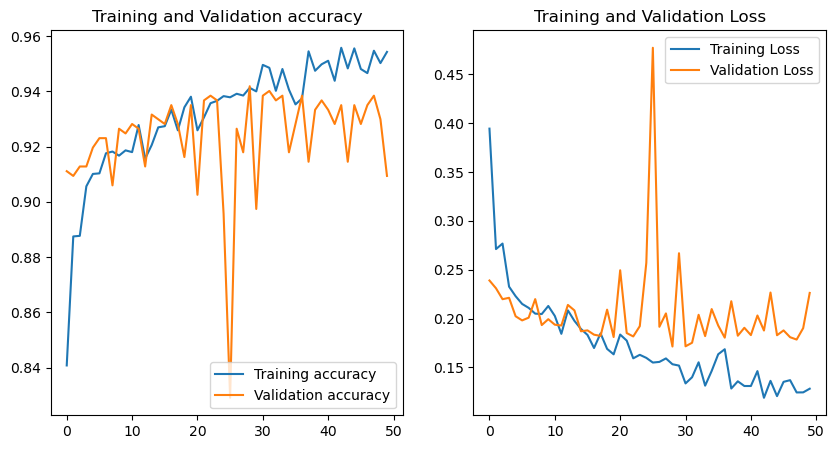

,loss,auc,recall,accuracy
Train,0.138450,0.989510,0.992686,0.944705
Val,0.226306,0.971756,0.978923,0.909402
Diff,0.087856,-0.017754,-0.013763,-0.035304


------------------------------



In [25]:
model_3 = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')])

results_3, model_3 = modeler(
    model_3, file_name= 'model_3', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50)

Training time: 55.152647733688354 seconds



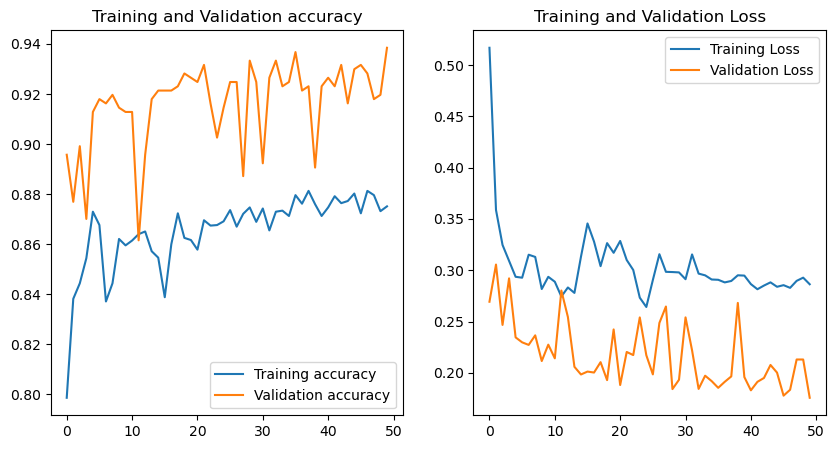

,loss,auc,recall,accuracy
Train,0.138292,0.985852,0.949678,0.944492
Val,0.175654,0.974380,0.957845,0.938462
Diff,0.037362,-0.011473,0.008167,-0.006030


------------------------------



In [26]:
model_4 = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')])

results_4, model_4 = modeler(
    model_4, file_name= 'model_4', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50)

In [33]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', 
                               min_delta=0.001, 
                               patience=10, 
                               mode='min', 
                               restore_best_weights=True,
                               verbose=1,
                               start_from_epoch=0)

Restoring model weights from the end of the best epoch: 10.
Epoch 20: early stopping
Training time: 177.8596260547638 seconds



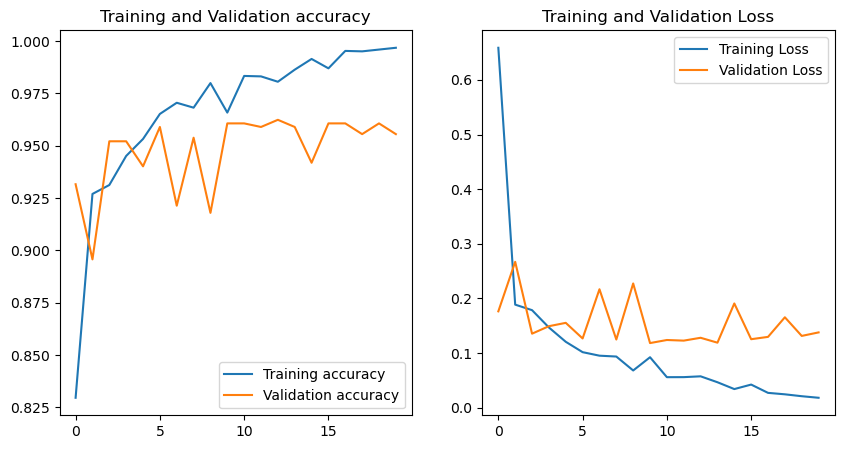

,loss,auc,recall,accuracy
Train,0.048144,0.997613,0.993563,0.989112
Val,0.118365,0.988328,0.976581,0.960684
Diff,0.070221,-0.009285,-0.016983,-0.028428


------------------------------



In [30]:
model_5 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_5, model_5 = modeler(
    model_5, file_name = 'model_5', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Restoring model weights from the end of the best epoch: 6.
Epoch 16: early stopping
Training time: 177.44253516197205 seconds



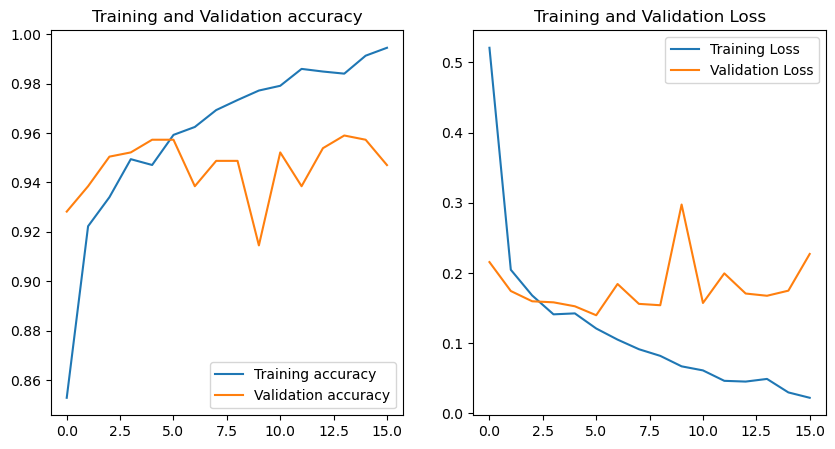

,loss,auc,recall,accuracy
Train,0.088394,0.992964,0.979228,0.969898
Val,0.139812,0.981643,0.971897,0.957265
Diff,0.051418,-0.011322,-0.007331,-0.012633


------------------------------



In [31]:
model_6 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_6, model_6 = modeler(
    model_6, file_name = 'model_6', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

In [34]:
model_7 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_7, model_7 = modeler(
    model_7, file_name = 'model_7', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

KeyboardInterrupt: 

In [ ]:
model_8 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_8, model_8 = modeler(
    model_8, file_name = 'model_8', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

In [ ]:
model_9 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_9, model_9 = modeler(
    model_9, file_name = 'model_9', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

In [ ]:
model_10 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
results_10, model_10 = modeler(
    model_10, file_name = 'model_10', file_path= 'saved_models/', 
    model_10=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

In [35]:
from tensorflow.keras.models import load_model
import pickle
import matplotlib.pyplot as plt
import pandas as pd
def load_viz(results, num_epochs):
    """
    Visualizes training results including accuracy/recall/auc and loss over epochs.

    Parameters:
    - results: The History object returned from the fit method of the model.
    - num_epochs: Number of epochs the model was trained for.
    """
    metric_keys = list(results.keys())
    metric = metric_keys[3]  
    train_metric = results[metric]
    val_metric = results['val_' + metric]

    epochs_range = range(num_epochs)

    plt.figure(figsize=(10, 5))

    # Plotting metric
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_metric, label=f'Training {metric}')
    plt.plot(epochs_range, val_metric, label=f'Validation {metric}')
    plt.legend(loc='lower right')
    plt.title(f'Training and Validation {metric}')

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, results['loss'], label='Training Loss')
    plt.plot(epochs_range, results['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def load_modeler(model_path, results_path, train=None, val=None, test=None):
    
    with open(results_path, 'rb') as h:
        RESULTS = pickle.load(h)
    EPOCHS = len(RESULTS['loss'])
    load_viz(RESULTS,EPOCHS)
    
    model = load_model(model_path)
    
    # Evaluate model
    train_scores = model.evaluate(train, verbose=0)
    val_scores = model.evaluate(val, verbose=0)
    
    # Display performance difference
    metric_list = list(RESULTS.keys())
    n = int(len(metric_list)/2)
    metrics_names = [metric_list[i] for i in range(0,n)]
    diff_scores = [val - train for train, val in zip(train_scores, val_scores)]
    performance_df = pd.DataFrame([train_scores, val_scores, diff_scores], 
                               index=['Train', 'Val', 'Diff'], columns=metrics_names)
    display(performance_df)
    print('------------------------------\n')

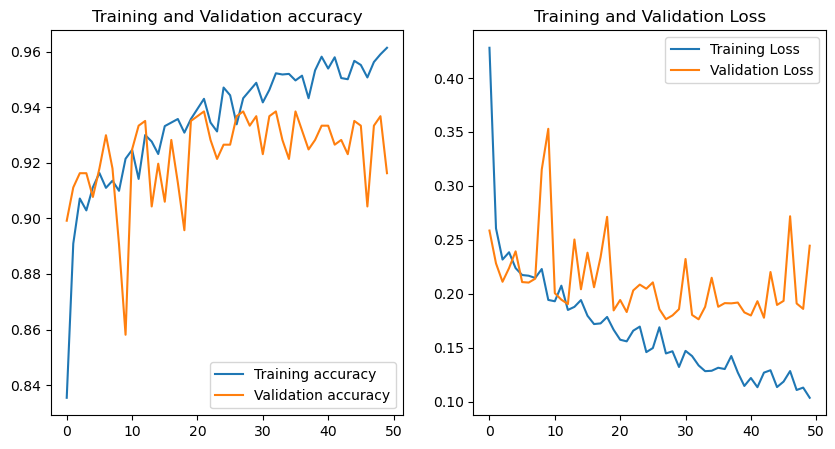

,loss,auc,recall,accuracy
Train,0.123548,0.992807,0.995026,0.948762
Val,0.244597,0.961647,0.983607,0.916239
Diff,0.121049,-0.031160,-0.011420,-0.032522


------------------------------



In [36]:
load_modeler(
    model_path= 'try_load/model_2.keras',
    results_path= 'try_load/model_2.pkl',
    train= train_ds, 
    val= val_ds)

In [38]:
model = load_model('try_load/model_2.keras')

In [48]:
model.